<a href="https://colab.research.google.com/github/wf-yamaday/machine-learning/blob/master/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%BB%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E8%AB%96/report/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# レポート課題

## 課題1

標準正規分布 N(x | 0, 1) に従う正規乱数を N 個⽣成しヒストグラムで表⽰せよ．
但し N = 10, 100, 1000, 10000のようにサイズを変化させて表⽰せよ．

In [0]:
# ライブラリのインポート
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pylab as plt

In [0]:
# グラフタイトルで日本語を使用するため
!apt-get -y install fonts-ipafont-gothic

# キャッシュを削除
!rm /root/.cache/matplotlib/fontlist-v300.json

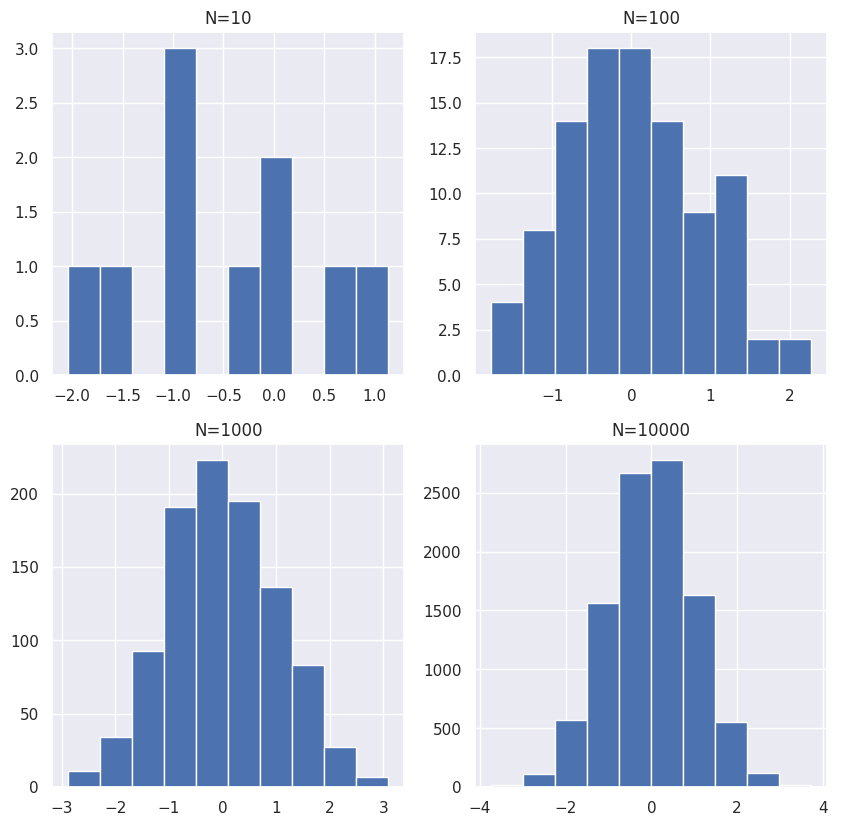

In [0]:
N = 10

plt.figure(figsize = (10, 10), dpi = 100) # グラフサイズの調整

for i in range(4):
  n = N *10 ** i
  x = np.random.randn(n)  # 正規乱数生成
  plt.subplot(2, 2, i + 1)
  plt.title('N={0}'.format(n))
  plt.hist(x)

## 課題2

⽣成した N 個のデータから最尤推定を⽤いてパラメータを推定せよ．
その際 N と関連して，推定値がどの程度ブレるかを考察しなさい．
ブレに関しては，M 個の異なるデータセットを⽣成し，最尤推定を M 回試⾏して，その平均を評価すると良い

In [0]:
# 評価用の真の値
mu = 0
sigma = 1

In [0]:
# 最尤推定パラメータ
def LikelihoodFunc(N):
  x = mu + sigma * np.random.randn(N)
  mu_hat = np.mean(x)
  sigma_hat = np.var(x)
  return mu_hat, sigma_hat

In [0]:
m, s = LikelihoodFunc(100)
print('推定パラメータは，mu_hat = {}, sigma_hat^2 = {}です．'.format(m, s))

推定パラメータは，mu_hat = -0.10516051530637112, sigma_hat^2 = 0.8732397298790279です．


ここまでで，最尤推定によってN個のデータセットからパラメータの推定を行う関数を作成した．
次に推定値がどの程度ブレるかを評価するために評価用の関数を作成する．
評価用関数は，M回推定した時の推定値の平均値と $\mu = 0, \sigma^2 = 1$との差の絶対値を返す．

In [0]:
# パラメータの評価用関数
def EvaluationFunc(M, N): # M回最尤推定を行う．
  mu_hat = []
  sigma_hat = []
  for i in range(M):
    m, s = LikelihoodFunc(N)
    mu_hat.append(m)
    sigma_hat.append(s)
  return abs(mu - np.mean(np.array(mu_hat))), abs(sigma - np.mean(np.array(sigma_hat)))

In [0]:
# 試しにN = 10, M = 10で実行
m, s = EvaluationFunc(10, 10)
print(m)
print(s)

0.007706570689602893
0.1316119267089706


実際に，N = 10, 100, 1000, 10000で評価用の関数を実行し，その値をグラフに描画する．
推定を行う回数は10回とする．

In [0]:
x = [] # グラフに描画するx軸
y_m = [] # muのブレ
y_s = [] # sigmaのブレ
for i in range(4):
  n = (N *10 ** i)
  m, s = EvaluationFunc(10, n)
  x.append(i)
  y_m.append(m)
  y_s.append(s)

In [0]:
print(np.array(y_m))
print(np.array(y_s))

[0.07399596 0.02523255 0.00320874 0.00139276]
[0.03049609 0.02898675 0.01050889 0.00366161]


<BarContainer object of 4 artists>

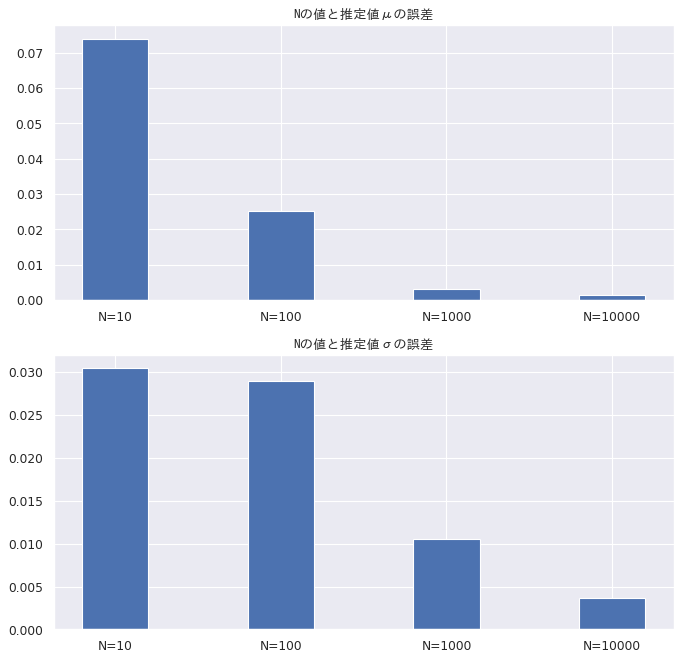

In [0]:
plt.figure(figsize=(10,10),dpi=80) # グラフサイズの調整

jp_font = {'fontname':'IPAGothic'}

plt.subplot(2,1,1)
plt.title('Nの値と推定値μの誤差', **jp_font)
plt.xticks(x, ['N=10','N=100','N=1000','N=10000'])
plt.bar(np.array(x), np.array(y_m), width=0.4)

plt.subplot(2,1,2)
plt.title('Nの値と推定値σの誤差', **jp_font)
plt.xticks(x, ['N=10','N=100','N=1000','N=10000'])
plt.bar(np.array(x), np.array(y_s), width=0.4)


## 考察

今回のデータセットでは，Nの値がN=10, 100, 1000, 10000に増えるに従って推定値（$\hat{\mu}, \hat{\sigma^2}$）の平均と真の値のブレ（誤差）は小さくなっている．  
以下に$|\mu - \hat{\mu}|, |\sigma^2 - \hat{\sigma^2}|$の値を表に示す．

|N|10|100|1000|1000|
|:--:|:--:|:--:|:--:|:--:|
|$\muとの誤差$|0.07399596|0.02523255|0.00320874|0.00139276|
|$\sigmaとの誤差$|0.03049609|0.02898675|0.01050889|0.00366161|

このことから最尤推定では，推定値の精度を上げるには，十分なデータセットを確保することが重要だとわかる．  
